In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import folium
from plotnine import *

# 서울지역 GS25 편의점과 CU편의점 매장 지리적 분포 비교

In [2]:
plt.rc('font',family="Malgun Gothic")

In [19]:
data = pd.read_csv("C:/Users/joyh1/Desktop/DSC/Inflearn강의자료/데이터분석/data/소상공인시장진흥공단_상가업소정보_201909_01.csv")

In [23]:
data.head(2)

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,19911397,커피빈코리아선릉로93길점,코리아선릉로93길점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,1168010100106960042022041,NaN,서울특별시 강남구 선릉로93길 6,135080,6149.0,NaN,1,NaN,127.047883,37.505675
1,19911801,프로포즈,NaN,Q,음식,Q09,유흥주점,Q09A01,호프/맥주,I56219,...,1154510200101620001017748,NaN,서울특별시 금천구 가산로 34-6,153010,8545.0,NaN,1,NaN,126.899220,37.471711


In [24]:
data.isnull().sum()

상가업소번호            0
상호명               1
지점명          491794
상권업종대분류코드         0
상권업종대분류명          0
상권업종중분류코드         0
상권업종중분류명          0
상권업종소분류코드         0
상권업종소분류명          0
표준산업분류코드      33421
표준산업분류명       33421
시도코드              0
시도명               0
시군구코드             0
시군구명              0
행정동코드             0
행정동명              0
법정동코드             0
법정동명              0
지번코드              0
대지구분코드            0
대지구분명             0
지번본번지             0
지번부번지         97666
지번주소              0
도로명코드             0
도로명               0
건물본번지             0
건물부번지        496565
건물관리번호            0
건물명          305226
도로명주소             0
구우편번호             0
신우편번호             9
동정보          517438
층정보          222565
호정보          484278
경도                0
위도                0
dtype: int64

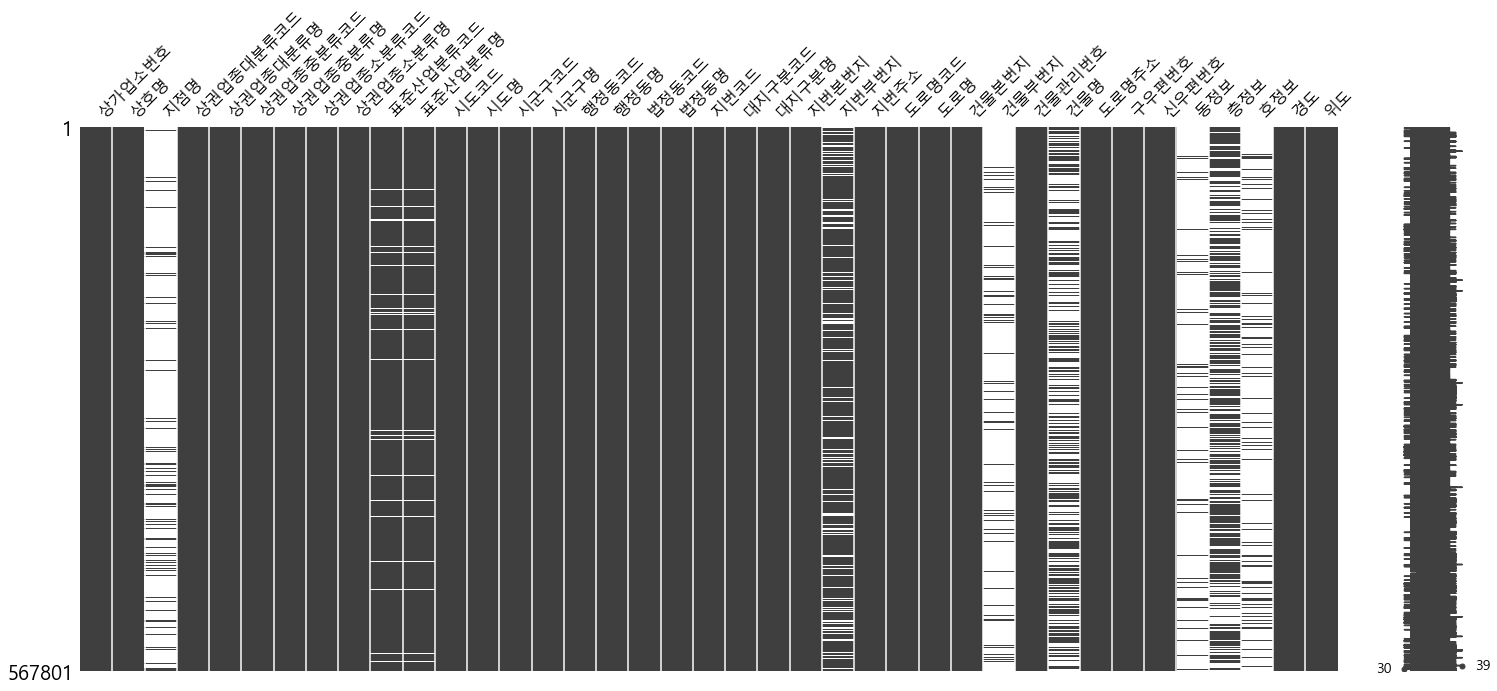

In [25]:
# 칼럼별로 결측치 얼마나 있는지 시각화
# 흰색 = 결측치

import missingno as msn
msn.matrix(data)

In [26]:
# data 칼럼들 확인
data.columns

Index(['상가업소번호', '상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드',
       '상권업종중분류명', '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보', '경도', '위도'],
      dtype='object')

In [32]:
# 필요없는 칼럼들 1차제거
columns = ['상가업소번호','상권업종대분류코드','상권업종중분류코드','상권업종소분류코드','표준산업분류코드',
           '표준산업분류명', '시도코드', '시군구코드', '법정동코드', 
           '지번코드','대지구분코드', '대지구분명', '지번본번지', '지번부번지','도로명코드',
           '도로명', '건물본번지','건물부번지', '건물관리번호', '건물명', '구우편번호', '신우편번호', '동정보',
           '층정보','호정보']



In [35]:
data = data.drop(columns=columns).copy()

In [36]:
data.head(2)

,상호명,지점명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동코드,행정동명,법정동명,지번주소,도로명주소,경도,위도
0,커피빈코리아선릉로93길점,코리아선릉로93길점,음식,커피점/카페,커피전문점/카페/다방,서울특별시,강남구,1168064000,역삼1동,역삼동,서울특별시 강남구 역삼동 696-42,서울특별시 강남구 선릉로93길 6,127.047883,37.505675
1,프로포즈,NaN,음식,유흥주점,호프/맥주,서울특별시,금천구,1154563000,독산3동,독산동,서울특별시 금천구 독산동 162-1,서울특별시 금천구 가산로 34-6,126.899220,37.471711


In [37]:
# 다시 결측치 집계
data.isnull().sum()

상호명              1
지점명         491794
상권업종대분류명         0
상권업종중분류명         0
상권업종소분류명         0
시도명              0
시군구명             0
행정동코드            0
행정동명             0
법정동명             0
지번주소             0
도로명주소            0
경도               0
위도               0
dtype: int64

In [41]:
# 상호명 결측치 1개 값인 데이터 조회 
# 지점명이 있으면 지점명 데이터로 대체하려 했으니 지점명 데이터도 존재하지 않음
# 지점명 데이터 삭제
data[data['상호명'].isnull()]

,상호명,지점명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동코드,행정동명,법정동명,지번주소,도로명주소,경도,위도
415704,NaN,NaN,소매,가방/신발/액세서리,가방/가죽제품소매,부산광역시,부산진구,2623052000,부전2동,부전동,부산광역시 부산진구 부전동 573-1,부산광역시 부산진구 중앙대로 717,129.059161,35.155254


In [47]:
# index번호를 아니 drop 인자에 index 넣어서 해당 행 삭제
data = data.drop(index=415704)

In [48]:
# 상호명이 결측치로 있던 유일한 데이터 1개 사라졌는지 보기
data[data['상호명'].isnull()]

,상호명,지점명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동코드,행정동명,법정동명,지번주소,도로명주소,경도,위도


In [50]:
# 이제 결측치가 없으니 데이터 구조 살펴보기
data.shape

(567799, 14)

In [58]:
# 상호명에 GS25나 CU가 있는지 찾아보자
data_gs = data.loc[(data['상호명'].str.contains("GS")) & (data['상권업종소분류명'] == "편의점")]

In [59]:
data_gs.head()

,상호명,지점명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동코드,행정동명,법정동명,지번주소,도로명주소,경도,위도
590,GS25해운리베라,NaN,소매,종합소매점,편의점,부산광역시,해운대구,2635053000,중1동,중동,부산광역시 해운대구 중동 1380-22,부산광역시 해운대구 구남로29번길 26,129.161980,35.162279
629,GS,천호삼성점,소매,종합소매점,편의점,서울특별시,강동구,1174062000,천호3동,천호동,서울특별시 강동구 천호동 169-13,서울특별시 강동구 성안로25길 21,127.134360,37.538247
1033,GS25안암학사,NaN,소매,종합소매점,편의점,서울특별시,성북구,1129060000,안암동,안암동5가,서울특별시 성북구 안암동5가 1-2,서울특별시 성북구 인촌로 105,127.030958,37.586488
1038,GS25,자양한강점,소매,종합소매점,편의점,서울특별시,광진구,1121584700,자양4동,자양동,서울특별시 광진구 자양동 81,서울특별시 광진구 능동로3길 54,127.064504,37.534218
1118,GS25,학장공단점,소매,종합소매점,편의점,부산광역시,사상구,2653067000,학장동,학장동,부산광역시 사상구 학장동 274-8,부산광역시 사상구 가야대로176번길 24,128.991098,35.148573


In [63]:
# 혹시 모르니 한글 "쥐에스"글자를 포함하는 행도 찾아보자
data.loc[(data['상호명'].str.contains("지에스|쥐에스")) & (data['상권업종소분류명'] == "편의점")]

,상호명,지점명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동코드,행정동명,법정동명,지번주소,도로명주소,경도,위도
1916,지에스25용마파크,NaN,소매,종합소매점,편의점,서울특별시,중랑구,1126054000,면목4동,면목동,서울특별시 중랑구 면목동 1502-2,서울특별시 중랑구 용마산로 248,127.088467,37.575196
2767,지에스25신월유진,NaN,소매,종합소매점,편의점,서울특별시,양천구,1147061100,신월7동,신월동,서울특별시 양천구 신월동 963-12,서울특별시 양천구 남부순환로70길 16,126.835043,37.521797
3766,지에스25부산대학교웅비관내,NaN,소매,종합소매점,편의점,부산광역시,금정구,2641061000,장전2동,장전동,부산광역시 금정구 장전동 30,부산광역시 금정구 부산대학로63번길 2-1,129.073322,35.236425
5353,지에스25성내이안,NaN,소매,종합소매점,편의점,서울특별시,강동구,1174065000,성내2동,성내동,서울특별시 강동구 성내동 25-1,서울특별시 강동구 천호대로162길 34,127.127932,37.535442
7881,지에스장림우주점,우주점,소매,종합소매점,편의점,부산광역시,사하구,2638059000,장림2동,장림동,부산광역시 사하구 장림동 332-6,부산광역시 사하구 장림번영로 32,128.968849,35.080598
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
522651,지에스월드컵경기장역,NaN,소매,종합소매점,편의점,서울특별시,마포구,1144073000,성산2동,성산동,서울특별시 마포구 성산동 515,서울특별시 마포구 월드컵로 240,126.897257,37.568276
550366,지에스,반여메트로점,소매,종합소매점,편의점,부산광역시,해운대구,2635057000,반여1동,반여동,부산광역시 해운대구 반여동 1247-1,부산광역시 해운대구 반여로 161,129.126013,35.205444
554187,지에스25역점,NaN,소매,종합소매점,편의점,서울특별시,강북구,1130553400,삼양동,미아동,서울특별시 강북구 미아동 745-100,서울특별시 강북구 삼양로 201,127.020124,37.621746
555625,지에스25신설으뜸,NaN,소매,종합소매점,편의점,서울특별시,동대문구,1123053600,용신동,신설동,서울특별시 동대문구 신설동 102-4,서울특별시 동대문구 왕산로2길 34,127.025991,37.574895


In [66]:
# 다행히 소문자 gs 로 쳐보았을 때는 데이터가 존재하지 않는다.
data_gs = data.loc[(data['상호명'].str.contains("gs")) & (data['상권업종소분류명'] == "편의점")]

In [ ]:
# 그렇다면 "GS, 쥐에스, 지에스" 셋 중하나를 포함하면서 상권업종소분류명이 편의점인 행만 갖고오면 되겠다. 

# 이제 raw data인 data라는 dataframe에서 CU 편의점을 찾아보자

In [73]:
data.loc[(data['상호명'].str.contains("CU|cu")) & (data['상권업종소분류명'] == "편의점")]

,상호명,지점명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동코드,행정동명,법정동명,지번주소,도로명주소,경도,위도
928,CU역삼달샘점,역삼달샘점,소매,종합소매점,편의점,서울특별시,강남구,1168064000,역삼1동,역삼동,서울특별시 강남구 역삼동 637-9,서울특별시 강남구 테헤란로19길 29,127.032799,37.501885
1640,CU,편의점,소매,종합소매점,편의점,서울특별시,영등포구,1156066000,신길4동,신길동,서울특별시 영등포구 신길동 236,서울특별시 영등포구 가마산로 496,126.911380,37.505532
2250,CU,응암중앙점,소매,종합소매점,편의점,서울특별시,은평구,1138058000,응암1동,응암동,서울특별시 은평구 응암동 110-1,서울특별시 은평구 은평로 116,126.920697,37.599929
2589,CU,목동5단지점,소매,종합소매점,편의점,서울특별시,양천구,1147055000,목5동,목동,서울특별시 양천구 목동 912,서울특별시 양천구 목동동로 350,126.881860,37.535144
6084,CU동국대기숙사점,동국대기숙사점,소매,종합소매점,편의점,서울특별시,중구,1114058000,장충동,장충동2가,서울특별시 중구 장충동2가 192-5,서울특별시 중구 필동로1길 30,126.998500,37.559149
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
567507,CU,월계청백점,소매,종합소매점,편의점,서울특별시,노원구,1135057000,월계2동,월계동,서울특별시 노원구 월계동 774,서울특별시 노원구 초안산로 89,127.052026,37.635810
567508,CU,방화1호점,소매,종합소매점,편의점,서울특별시,강서구,1150064100,방화3동,방화동,서울특별시 강서구 방화동 141,서울특별시 강서구 방화대로52길 40,126.819011,37.577890
567599,CU,부암화승점,소매,종합소매점,편의점,부산광역시,부산진구,2623066000,부암3동,부암동,부산광역시 부산진구 부암동 500-6,부산광역시 부산진구 백양순환로 89,129.036906,35.170220
567635,CU,반여우방점,소매,종합소매점,편의점,부산광역시,해운대구,2635059500,반여4동,반여동,부산광역시 해운대구 반여동 1190-1,부산광역시 해운대구 삼어로 61,129.116171,35.202867


In [ ]:
# 그렇다면 한글로된 씨유, 시유 둘 중 하나를 포함하는 데이터가 있는지 찾아보자

In [70]:
data.loc[(data['상호명'].str.startswith("씨유")) & (data['상권업종소분류명'] == "편의점")]

,상호명,지점명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동코드,행정동명,법정동명,지번주소,도로명주소,경도,위도
2400,씨유대치우일,NaN,소매,종합소매점,편의점,서울특별시,강남구,1168063000,대치4동,대치동,서울특별시 강남구 대치동 907,서울특별시 강남구 선릉로 406,127.050813,37.501148
2687,씨유장안플러스,NaN,소매,종합소매점,편의점,서울특별시,동대문구,1123065000,장안1동,장안동,서울특별시 동대문구 장안동 430-2,서울특별시 동대문구 장한로 47,127.066888,37.565368
3821,씨유수영로교회,NaN,소매,종합소매점,편의점,부산광역시,해운대구,2635052000,우2동,우동,부산광역시 해운대구 우동 1418-1,부산광역시 해운대구 해운대해변로 43,129.139259,35.164641
8458,씨유면목베네스트,NaN,소매,종합소매점,편의점,서울특별시,중랑구,1126056500,면목본동,면목동,서울특별시 중랑구 면목동 555-16,서울특별시 중랑구 면목로55길 70,127.084447,37.584581
8531,씨유중랑본,NaN,소매,종합소매점,편의점,서울특별시,중랑구,1126059000,상봉2동,상봉동,서울특별시 중랑구 상봉동 87-18,서울특별시 중랑구 봉우재로33길 58,127.088762,37.594697
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
522364,씨유기획,NaN,소매,종합소매점,편의점,부산광역시,해운대구,2635052000,우2동,우동,부산광역시 해운대구 우동 1462,부산광역시 해운대구 센텀중앙로 78,129.127027,35.174643
532778,씨유신평동매점,NaN,소매,종합소매점,편의점,부산광역시,사하구,2638057100,신평1동,신평동,부산광역시 사하구 신평동 84-90,부산광역시 사하구 신산로 177-10,128.975670,35.090783
554147,씨유당리푸르지오,NaN,소매,종합소매점,편의점,부산광역시,사하구,2638055000,당리동,당리동,부산광역시 사하구 당리동 318-14,부산광역시 사하구 승학로71번길 1,128.975956,35.104708
561792,씨유레저,NaN,소매,종합소매점,편의점,서울특별시,송파구,1171058000,송파1동,송파동,서울특별시 송파구 송파동 29,서울특별시 송파구 백제고분로41길 40,127.106170,37.509167


In [78]:
# Gs편의점과 CU편의점으로만 이루어진 데이터 추출
conven = data.loc[(data['상호명'].str.contains("GS|쥐에스|CU|cu")) & (data['상권업종소분류명'] == "편의점")]

In [79]:
conven.shape

(6633, 14)

In [81]:
conven.head(2)

,상호명,지점명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동코드,행정동명,법정동명,지번주소,도로명주소,경도,위도
590,GS25해운리베라,NaN,소매,종합소매점,편의점,부산광역시,해운대구,2635053000,중1동,중동,부산광역시 해운대구 중동 1380-22,부산광역시 해운대구 구남로29번길 26,129.16198,35.162279
629,GS,천호삼성점,소매,종합소매점,편의점,서울특별시,강동구,1174062000,천호3동,천호동,서울특별시 강동구 천호동 169-13,서울특별시 강동구 성안로25길 21,127.13436,37.538247


In [84]:
# 해당 데이터 인덱스 초기화
conven = conven.reset_index(drop=True)
conven.head(2)

,상호명,지점명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동코드,행정동명,법정동명,지번주소,도로명주소,경도,위도
0,GS25해운리베라,NaN,소매,종합소매점,편의점,부산광역시,해운대구,2635053000,중1동,중동,부산광역시 해운대구 중동 1380-22,부산광역시 해운대구 구남로29번길 26,129.16198,35.162279
1,GS,천호삼성점,소매,종합소매점,편의점,서울특별시,강동구,1174062000,천호3동,천호동,서울특별시 강동구 천호동 169-13,서울특별시 강동구 성안로25길 21,127.13436,37.538247


In [85]:
# 서울의 데이터만 뽑아내기 위해 '시도명' 칼럼이 일정한지 확인
conven['시도명'].value_counts()

서울특별시    5148
부산광역시    1485
Name: 시도명, dtype: int64

In [86]:
# 그냥 '서울' 이렇게만 되어있지 않고 모두 '서울특별시'로 되어 있으니 서울의 데이터만 추출
conven_seoul = conven.loc[conven['시도명'] == "서울특별시"]
conven_seoul.head()

,상호명,지점명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동코드,행정동명,법정동명,지번주소,도로명주소,경도,위도
1,GS,천호삼성점,소매,종합소매점,편의점,서울특별시,강동구,1174062000,천호3동,천호동,서울특별시 강동구 천호동 169-13,서울특별시 강동구 성안로25길 21,127.134360,37.538247
2,CU역삼달샘점,역삼달샘점,소매,종합소매점,편의점,서울특별시,강남구,1168064000,역삼1동,역삼동,서울특별시 강남구 역삼동 637-9,서울특별시 강남구 테헤란로19길 29,127.032799,37.501885
3,GS25안암학사,NaN,소매,종합소매점,편의점,서울특별시,성북구,1129060000,안암동,안암동5가,서울특별시 성북구 안암동5가 1-2,서울특별시 성북구 인촌로 105,127.030958,37.586488
4,GS25,자양한강점,소매,종합소매점,편의점,서울특별시,광진구,1121584700,자양4동,자양동,서울특별시 광진구 자양동 81,서울특별시 광진구 능동로3길 54,127.064504,37.534218
7,CU,편의점,소매,종합소매점,편의점,서울특별시,영등포구,1156066000,신길4동,신길동,서울특별시 영등포구 신길동 236,서울특별시 영등포구 가마산로 496,126.911380,37.505532


In [87]:
# 서울 지역의 편의점(GS와 CU모두 포함) 데이터 확인
conven_seoul.shape

(5148, 14)

C:\Users\joyh1\Anaconda3\envs\venv\lib\site-packages\plotnine\scales\scale.py:93: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(self.breaks) and cbook.iterable(self.labels):
C:\Users\joyh1\Anaconda3\envs\venv\lib\site-packages\plotnine\utils.py:553: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  return cbook.iterable(var) and not is_string(var)


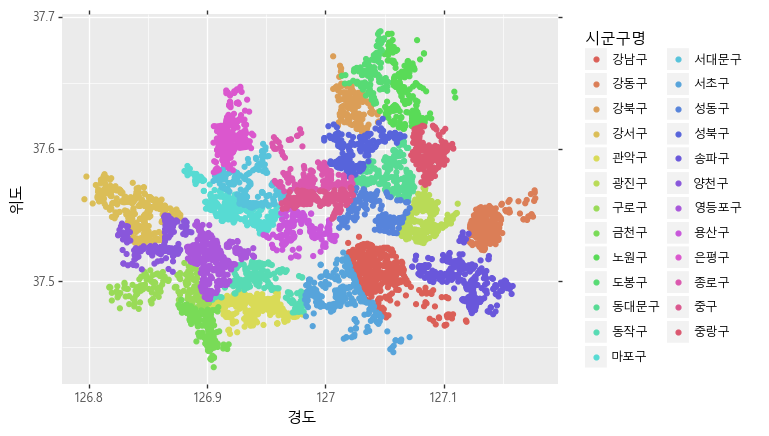

<ggplot: (154224517384)>

In [89]:
# 서울 구명별로 얼마나 편의점(GS와 CU모두 포함)이 있는지 확인
(ggplot(conven_seoul)
 +aes(x='경도',y='위도', color='시군구명')
 +geom_point()
 +theme(text=element_text(family="Malgun Gothic"))
)

# 서울지역 경도,위도를 벗어나는 이상치(Outlier)는 없는 것으로 판단

In [93]:
# 상호명이 중구난방이니 '브랜드명' 칼럼을 하나 추가하여 상호명을 각각 "GS25, CU"로 통일해주자
conven_seoul['브랜드명'] = ''
conven_seoul.loc[conven_seoul['상호명'].str.contains("GS|쥐에스"), '브랜드명'] = 'GS25'

C:\Users\joyh1\Anaconda3\envs\venv\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\joyh1\Anaconda3\envs\venv\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [95]:
conven_seoul.loc[conven_seoul['상호명'].str.contains("CU|cu"), '브랜드명'] = 'CU'

C:\Users\joyh1\Anaconda3\envs\venv\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [101]:
conven_seoul.shape

(5148, 15)

In [100]:
conven_seoul['브랜드명'].value_counts()

GS25    2834
CU      2314
Name: 브랜드명, dtype: int64

In [103]:
# 브랜드명이 모든 행에 각각 잘 들어갔다.
2834+2314

5148

In [104]:
# 이제 GS25에 해당하는 데이터만 뽑아내보자
conven_gs = conven_seoul.loc[conven_seoul['브랜드명'] == "GS25"]
conven_gs.head()

,상호명,지점명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동코드,행정동명,법정동명,지번주소,도로명주소,경도,위도,브랜드명
1,GS,천호삼성점,소매,종합소매점,편의점,서울특별시,강동구,1174062000,천호3동,천호동,서울특별시 강동구 천호동 169-13,서울특별시 강동구 성안로25길 21,127.134360,37.538247,GS25
3,GS25안암학사,NaN,소매,종합소매점,편의점,서울특별시,성북구,1129060000,안암동,안암동5가,서울특별시 성북구 안암동5가 1-2,서울특별시 성북구 인촌로 105,127.030958,37.586488,GS25
4,GS25,자양한강점,소매,종합소매점,편의점,서울특별시,광진구,1121584700,자양4동,자양동,서울특별시 광진구 자양동 81,서울특별시 광진구 능동로3길 54,127.064504,37.534218,GS25
9,GS25,강남신성점,소매,종합소매점,편의점,서울특별시,강남구,1168064000,역삼1동,역삼동,서울특별시 강남구 역삼동 819,서울특별시 강남구 강남대로94길 10,127.028185,37.499189,GS25
11,GS25강남센타,NaN,소매,종합소매점,편의점,서울특별시,서초구,1165053100,서초4동,서초동,서울특별시 서초구 서초동 1303-22,서울특별시 서초구 강남대로 465,127.024088,37.503751,GS25


C:\Users\joyh1\Anaconda3\envs\venv\lib\site-packages\plotnine\scales\scale.py:93: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(self.breaks) and cbook.iterable(self.labels):
C:\Users\joyh1\Anaconda3\envs\venv\lib\site-packages\plotnine\utils.py:553: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  return cbook.iterable(var) and not is_string(var)


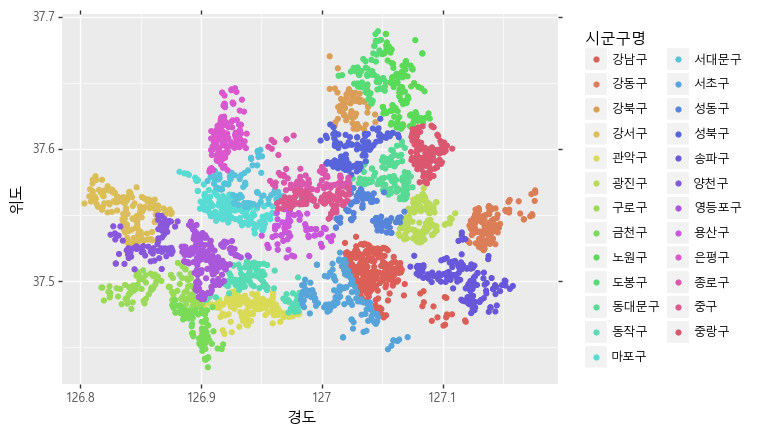

<ggplot: (-9223371882628783514)>

In [107]:
# GS25 편의점이 시군구명 별로 얼마나 분포되어 있는지 ggplot을 이용해 point로 나타내보자
(ggplot(conven_gs)
 +aes(x='경도', y='위도', color='시군구명')
 +geom_point()
 +theme(text=element_text(family="Malgun Gothic"))
)

In [109]:
conven_gs.head(2)

,상호명,지점명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동코드,행정동명,법정동명,지번주소,도로명주소,경도,위도,브랜드명
1,GS,천호삼성점,소매,종합소매점,편의점,서울특별시,강동구,1174062000,천호3동,천호동,서울특별시 강동구 천호동 169-13,서울특별시 강동구 성안로25길 21,127.134360,37.538247,GS25
3,GS25안암학사,NaN,소매,종합소매점,편의점,서울특별시,성북구,1129060000,안암동,안암동5가,서울특별시 성북구 안암동5가 1-2,서울특별시 성북구 인촌로 105,127.030958,37.586488,GS25


In [111]:
# 서울 전체구를 찍어보기엔 컴퓨터 리소스가 딸릴 것 같아 용산구지역 편의점만 추출하여 folium라이브러리를 이용해 지도에 표시해보겠다.

gs_yongsan = conven_gs.loc[conven_gs['시군구명'] == "용산구"]
gs_yongsan.head()

,상호명,지점명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동코드,행정동명,법정동명,지번주소,도로명주소,경도,위도,브랜드명
59,GS25용산프라임점,용산프라임점,소매,종합소매점,편의점,서울특별시,용산구,1117056000,원효로1동,원효로1가,서울특별시 용산구 원효로1가 41,서울특별시 용산구 원효로90길 11,126.969703,37.540385,GS25
88,GS25편의점게이트웨이,NaN,소매,종합소매점,편의점,서울특별시,용산구,1117053000,남영동,동자동,서울특별시 용산구 동자동 12,서울특별시 용산구 후암로 107,126.973541,37.553484,GS25
117,GS25남영역,NaN,소매,종합소매점,편의점,서울특별시,용산구,1117053000,남영동,갈월동,서울특별시 용산구 갈월동 101-49,서울특별시 용산구 한강대로 259,126.972392,37.541571,GS25
172,GS25원효타운,NaN,소매,종합소매점,편의점,서울특별시,용산구,1117056000,원효로1동,원효로2가,서울특별시 용산구 원효로2가 96-1,서울특별시 용산구 새창로 146,126.961817,37.534612,GS25
177,GS25이촌대림점,이촌대림점,소매,종합소매점,편의점,서울특별시,용산구,1117064000,이촌2동,이촌동,서울특별시 용산구 이촌동 199-31,서울특별시 용산구 이촌로22길 17,126.955827,37.525225,GS25


In [118]:
geo_df = gs_yongsan

map = folium.Map(location=[geo_df['위도'].mean(), geo_df['경도'].mean()], zoom_start=14)

for n in geo_df.index:
    shop_name = geo_df.loc[n, '상호명']+"-"+geo_df.loc[n, '지번주소']
    
    folium.Marker(location=[geo_df.loc[n, '위도'], geo_df.loc[n, '경도']],
                 popup=shop_name,
                 ).add_to(map)

#popup 한글 인코딩 깨짐 해결위한 hmtl파일로 개별 저장
# map.save("index.hmtl")

map

In [120]:
# 그렇다면 이제 CU편의점 데이터만 추출해보자.

cu_yongsan = conven_seoul.loc[(conven_seoul['브랜드명'] == "CU") & (conven_seoul['시군구명'] == "용산구")]
cu_yongsan.head()

,상호명,지점명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동코드,행정동명,법정동명,지번주소,도로명주소,경도,위도,브랜드명
282,CU,편의점,소매,종합소매점,편의점,서울특별시,용산구,1117056000,원효로1동,원효로1가,서울특별시 용산구 원효로1가 12-19,서울특별시 용산구 원효로89길 18,126.968226,37.540868,CU
313,CU,중앙박물관점,소매,종합소매점,편의점,서울특별시,용산구,1117069000,서빙고동,동빙고동,서울특별시 용산구 동빙고동 135,서울특별시 용산구 서빙고로73길 32,126.995859,37.522283,CU
335,CU,원효로2가점,소매,종합소매점,편의점,서울특별시,용산구,1117056000,원효로1동,원효로2가,서울특별시 용산구 원효로2가 61-7,서울특별시 용산구 원효로58길 28,126.963340,37.534968,CU
371,CU,용산서계점,소매,종합소매점,편의점,서울특별시,용산구,1117055500,청파동,서계동,서울특별시 용산구 서계동 32-1,서울특별시 용산구 청파로85길 46,126.966555,37.552846,CU
459,CU,한남리첸시아점,소매,종합소매점,편의점,서울특별시,용산구,1117068500,한남동,한남동,서울특별시 용산구 한남동 72-1,서울특별시 용산구 한남대로 60,127.007918,37.534261,CU


In [121]:
cu_yongsan.shape

(77, 15)

In [124]:
cu_yongsan['지점명'] = cu_yongsan['지점명'].fillna(cu_yongsan['상호명'])

C:\Users\joyh1\Anaconda3\envs\venv\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [125]:
cu_yongsan['지점명'].isnull().sum()

0

In [127]:
geo_df = cu_yongsan

map = folium.Map(location=[geo_df['위도'].mean(), geo_df['경도'].mean()], zoom_start=14)

for n in geo_df.index:
    shop_name = geo_df.loc[n, '상호명']+":"+geo_df.loc[n, '지점명']+"-"+geo_df.loc[n, '지번주소']
    
    folium.Marker(location=[geo_df.loc[n, '위도'], geo_df.loc[n, '경도']],
                 popup=shop_name).add_to(map)

#popup 한글 인코딩 깨짐 해결위한 hmtl파일로 개별 저장
# map.save("index.hmtl")

map

In [129]:
# 그러면 이제 용산구안에서의 GS25와 CU편의점의 각각 지리적위치를 다른색깔로 CIrcleMarker로 표시해보자.

# 우선은 conven_seoul이라는 서울지역의 GS,Cu편의점이 들어있는 데이터프레임에서 '용산구'에 해당하는 데이터들만 추출하자.

conven_yongsan = conven_seoul.loc[conven_seoul['시군구명'] == "용산구"]
conven_yongsan.head()

,상호명,지점명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동코드,행정동명,법정동명,지번주소,도로명주소,경도,위도,브랜드명
59,GS25용산프라임점,용산프라임점,소매,종합소매점,편의점,서울특별시,용산구,1117056000,원효로1동,원효로1가,서울특별시 용산구 원효로1가 41,서울특별시 용산구 원효로90길 11,126.969703,37.540385,GS25
88,GS25편의점게이트웨이,NaN,소매,종합소매점,편의점,서울특별시,용산구,1117053000,남영동,동자동,서울특별시 용산구 동자동 12,서울특별시 용산구 후암로 107,126.973541,37.553484,GS25
117,GS25남영역,NaN,소매,종합소매점,편의점,서울특별시,용산구,1117053000,남영동,갈월동,서울특별시 용산구 갈월동 101-49,서울특별시 용산구 한강대로 259,126.972392,37.541571,GS25
172,GS25원효타운,NaN,소매,종합소매점,편의점,서울특별시,용산구,1117056000,원효로1동,원효로2가,서울특별시 용산구 원효로2가 96-1,서울특별시 용산구 새창로 146,126.961817,37.534612,GS25
177,GS25이촌대림점,이촌대림점,소매,종합소매점,편의점,서울특별시,용산구,1117064000,이촌2동,이촌동,서울특별시 용산구 이촌동 199-31,서울특별시 용산구 이촌로22길 17,126.955827,37.525225,GS25


In [130]:
# 용산구 데이터만 뽑혔는지 확인해보자
conven_yongsan['시군구명'].unique()

array(['용산구'], dtype=object)

In [ ]:
# 이제 folium의 CircleMarker를 이용해서 편의점을 색깔별로 표시해보자

In [ ]:
# 이제는 GS, CU 편의점이 서울 전체구에서 몇개씩 있는지 지도에 표시해보자

In [ ]:
# 분석 주제 : GS25편의점과 CU편의점의 지리적 거리는 어떻고 갯수가 경쟁상대일만한가 또 서울의 어떤구가 어떤 편의점이많을까? 비교!